<a href="https://colab.research.google.com/github/litawandani/TugasPratikumML_234-244/blob/main/CNN_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Machine Learning"

In [3]:
%cd /content/drive/MyDrive/Machine Learning/

/content/drive/MyDrive/Machine Learning


In [4]:
!ls  

dataset  dataset_model	kaggle.json


In [5]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 76% 26.0M/34.1M [00:00<00:00, 55.0MB/s]
100% 34.1M/34.1M [00:00<00:00, 69.5MB/s]


In [6]:
!unzip \*.zip &> /dev/null && rm *.zip

In [7]:
from distutils.dir_util import copy_tree, remove_tree

base_dir = "/content/drive/My Drive/Machine Learning/Alzheimer_s Dataset"
root_dir = "./"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
  remove_tree (work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


Split Data

In [8]:
!pip install split_folders
import splitfolders

src = "/content/drive/My Drive/Machine Learning/dataset"
base_dir = "/content/drive/My Drive/Machine Learning/dataset_model"

splitfolders.ratio(src, output = base_dir, seed=240, ratio=(0.8,0.19,0.01))

Copying files: 6400 files [02:06, 50.61 files/s]


In [9]:
base_dir = "/content/drive/My Drive/Machine Learning/dataset_model"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

MildDem_train_dir = os.path.join(train_dir, 'MildDemented')
ModDem_train_dir = os.path.join(train_dir, 'ModerateDemented')
NonDem_train_dir = os.path.join(train_dir, 'NonDemented')
VermilDem_train_dir = os.path.join(train_dir, 'VeryMildDemented')

MildDem_val_dir = os.path.join(validation_dir, 'MildDemented')
ModDem_val_dir = os.path.join(validation_dir, 'ModerateDemented')
NonDem_val_dir = os.path.join(validation_dir, 'NonDemented')
VermilDem_val_dir = os.path.join(validation_dir, 'VeryMildDemented')

MildDem_test_dir = os.path.join(test_dir, 'MildDemented')
ModDem_test_dir = os.path.join(test_dir, 'ModerateDemented')
NonDem_test_dir = os.path.join(test_dir, 'NonDemented')
VermilDem_test_dir = os.path.join(test_dir, 'VeryMildDemented')

In [10]:
print('total training MildDemented images :', len(os.listdir(MildDem_train_dir)))
print('total training ModerateDemented images :', len(os.listdir(ModDem_train_dir)))
print('total training NonDemented images :', len(os.listdir(NonDem_train_dir)))
print('total training VeryMildDemented images :', len(os.listdir(VermilDem_train_dir)))

print('\ntotal test MildDemented images :', len(os.listdir(MildDem_test_dir)))
print('total test ModerateDemented images :', len(os.listdir(ModDem_test_dir)))
print('total test NonDemented images :', len(os.listdir(NonDem_test_dir)))
print('total test VeryMildDemented images :', len(os.listdir(VermilDem_test_dir)))

print('\ntotal validation MildDemented images :', len(os.listdir(MildDem_val_dir)))
print('total validation ModerateDemented images :', len(os.listdir(ModDem_val_dir)))
print('total validation NonDemented images :', len(os.listdir(NonDem_val_dir)))
print('total validation VeryMildDemented images :', len(os.listdir(VermilDem_val_dir)))

total training MildDemented images : 716
total training ModerateDemented images : 51
total training NonDemented images : 2560
total training VeryMildDemented images : 1792

total test MildDemented images : 10
total test ModerateDemented images : 1
total test NonDemented images : 32
total test VeryMildDemented images : 23

total validation MildDemented images : 170
total validation ModerateDemented images : 12
total validation NonDemented images : 608
total validation VeryMildDemented images : 425


Augmentasi

In [11]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

height = 150
width = 150
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

val_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 5119 images belonging to 4 classes.
Found 1215 images belonging to 4 classes.
Found 66 images belonging to 4 classes.


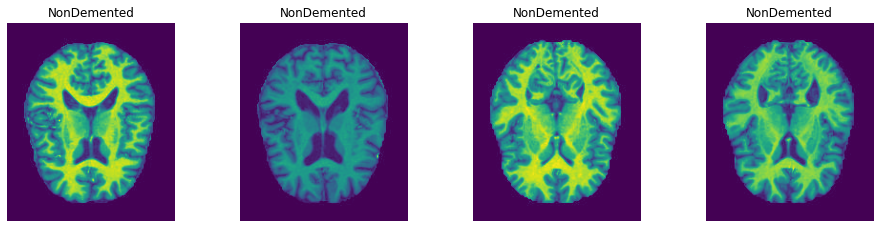

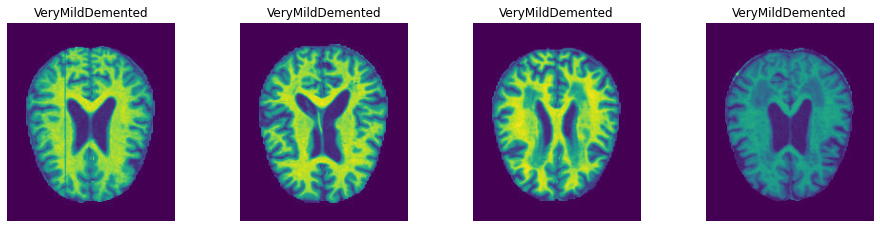

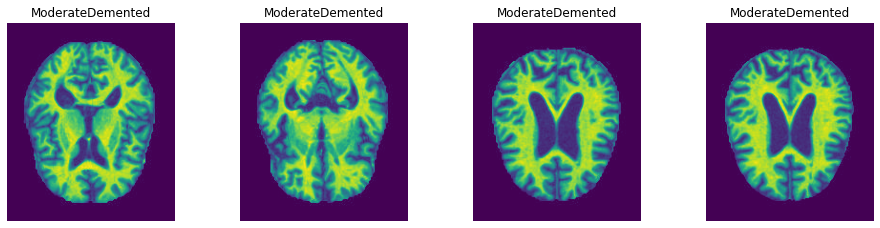

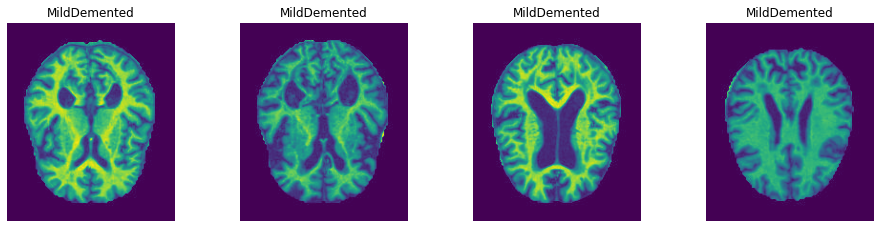

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

NonDemented_images = os.listdir(NonDem_train_dir)
VeryMildDemented_images = os.listdir(VermilDem_train_dir)
ModerateDemented_images = os.listdir(ModDem_train_dir)
MildDemented_images = os.listdir(MildDem_train_dir)

fname1 = [os.path.join(NonDem_train_dir,fname)
        for fname in NonDemented_images[:4]]

fname2 = [os.path.join(VermilDem_train_dir,fname)
        for fname in VeryMildDemented_images[:4]]

fname3 = [os.path.join(ModDem_train_dir,fname)
        for fname in ModerateDemented_images[:4]]

fname4 = [os.path.join(MildDem_train_dir,fname)
        for fname in MildDemented_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('NonDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('VeryMildDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('ModerateDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('MildDemented')
    plt.imshow(img)
plt.show()

Preprocessing

In [13]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [15]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [16]:
# Tampilkan shape dari data train dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

print("\nTest Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

print("\nValidation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (5119, 150, 150, 3)
Train Label =  (5119,)

Test Data =  (66, 150, 150, 3)
Test Label =  (66,)

Validation Data =  (1215, 150, 150, 3)
Validation Label =  (1215,)


In [17]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [18]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented'
 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2]


Modelling

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))

model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))

model2.add(Flatten())

In [21]:
# Fully Connected Layer
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(4, activation='softmax'))

In [22]:
# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 38, 38, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 38, 38, 32)       

In [23]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.8:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
# Compile model
from tensorflow.keras.optimizers import Adam

CALLBACKS = [my_callback]

model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [25]:
history = model2.fit(train_generator, batch_size = 32, epochs = 100, validation_data=val_generator, callbacks=CALLBACKS)

Epoch 1/100
160/160 [==============================] - 77s 289ms/step - loss: 1.5464 - acc: 0.4921 - val_loss: 1.5368 - val_acc: 0.5004
Epoch 2/100
160/160 [==============================] - 46s 290ms/step - loss: 0.9318 - acc: 0.5591 - val_loss: 2.1586 - val_acc: 0.5004
Epoch 3/100
160/160 [==============================] - 46s 289ms/step - loss: 0.8884 - acc: 0.5636 - val_loss: 0.9972 - val_acc: 0.5794
Epoch 4/100
160/160 [==============================] - 47s 292ms/step - loss: 0.8470 - acc: 0.5978 - val_loss: 0.7701 - val_acc: 0.6502
Epoch 5/100
160/160 [==============================] - 47s 291ms/step - loss: 0.8133 - acc: 0.6198 - val_loss: 0.7944 - val_acc: 0.6230
Epoch 6/100
160/160 [==============================] - 46s 287ms/step - loss: 0.7785 - acc: 0.6337 - val_loss: 0.6649 - val_acc: 0.6807
Epoch 7/100
160/160 [==============================] - 46s 287ms/step - loss: 0.7438 - acc: 0.6601 - val_loss: 0.7397 - val_acc: 0.6486
Epoch 8/100
160/160 [===========================

In [28]:
target_dir = "/content/drive/MyDrive/Praktikum"
model2.save(target_dir + '/model.h5')

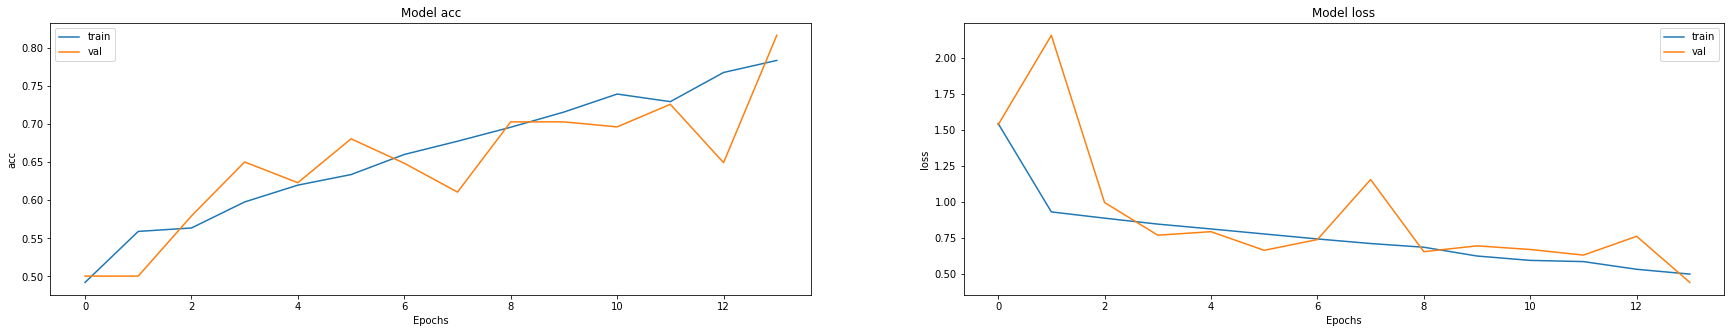

In [29]:
#Plotting the trend of the metrics during training
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [31]:
train_scores = model2.evaluate(train_generator)
val_scores = model2.evaluate(val_generator)
test_scores = model2.evaluate(test_generator)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

3/3 [==============================] - 0s 98ms/step - loss: 0.5140 - acc: 0.8182
Training Accuracy: 83.53%
Validation Accuracy: 81.65%
Testing Accuracy: 81.82%


In [34]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model2.predict(test_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

    MildDemented       1.00      0.70      0.82        10
ModerateDemented       1.00      1.00      1.00         1
     NonDemented       0.82      0.88      0.85        32
VeryMildDemented       0.75      0.78      0.77        23

        accuracy                           0.82        66
       macro avg       0.89      0.84      0.86        66
    weighted avg       0.83      0.82      0.82        66

